In [1]:
# source: https://www.kaggle.com/datasets/martinellis/synthetic-lego-images/

import cv2
import torch
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from lib.lego_dataset import SynthentcLegoImagesDataset

DATA_ROOT = Path('./datasets/synthetic-lego-images/versions/4/')

device = torch.device('cuda')

In [2]:
train_dataset = SynthentcLegoImagesDataset(DATA_ROOT, 'train', SynthentcLegoImagesDataset.get_transform_train())
valid_dataset = SynthentcLegoImagesDataset(DATA_ROOT, 'valid', SynthentcLegoImagesDataset.get_transform_valid())

def collate_fn(batch):
    return tuple(zip(*batch))

train_data_loader = DataLoader(
    train_dataset,
    batch_size=4,
    shuffle=True,
    num_workers=4,
    collate_fn=collate_fn
)

valid_data_loader = DataLoader(
    valid_dataset,
    batch_size=4,
    shuffle=False,
    num_workers=4,
    collate_fn=collate_fn
)

x = train_dataset[0][-1]

/home/kol/kol/redbull/.venv/lib/python3.13/site-packages/albumentations/core/composition.py:331: UserWarning: Got processor for bboxes, but no transform to process it.
  self._set_keys()


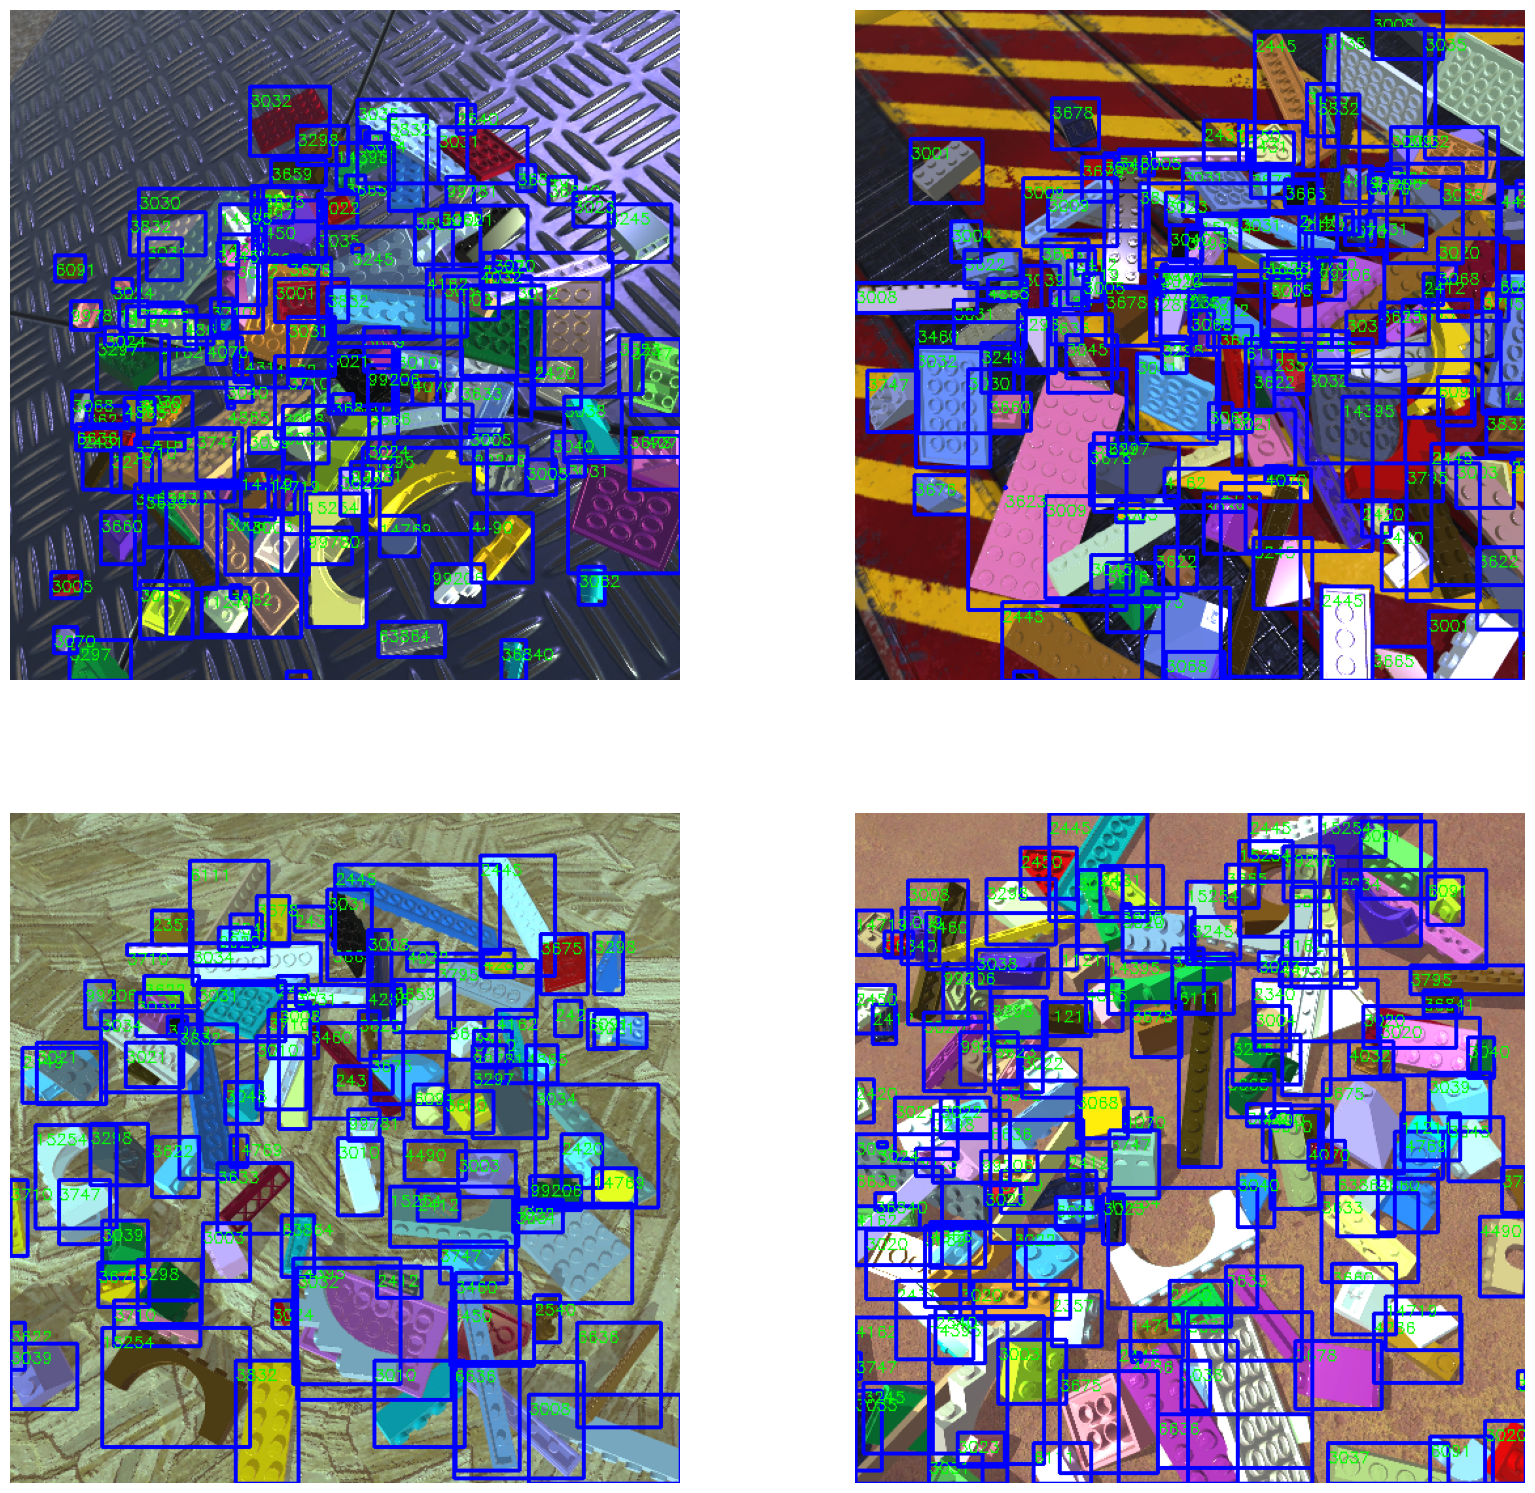

In [3]:
images, targets = next(iter(valid_data_loader))

plt.figure(figsize=(20,40))
for i, (image, target) in enumerate(zip(images, targets)):
    plt.subplot(4,2, i+1)
    boxes = target['boxes'].cpu().numpy().astype(np.int32)
    sample = image.permute(1,2,0).cpu().numpy()
    names = target['labels'].astype(np.int64)
    for i,box in enumerate(boxes):
        cv2.rectangle(sample,
                      (box[0], box[1]),
                      (box[2], box[3]),
                      (0, 0, 1), 2)
        cv2.putText(sample, train_dataset.classes[names[i]], (box[0],box[1]+15),cv2.FONT_HERSHEY_SIMPLEX,0.4,(0,1,0),1,cv2.LINE_AA)  

    plt.axis('off')
    plt.imshow(sample)


In [4]:

# plt.figure(figsize=(20,40))
# for i, (image, target, mask) in enumerate(zip(images, targets, masks)):
#     plt.subplot(4,2, i+1)
#     sample = np.array(mask).transpose(1,2,0)
#     plt.axis('off')
#     plt.imshow(sample)


In [5]:
# mask_reshaped = mask.permute(1, 2, 0).reshape(-1, 3)
# objects = torch.unique(mask_reshaped, dim=0)[1:]

# plt.figure(figsize=(20,20))
# for n, object_color in enumerate(objects):
#     plt.subplot(10, 10, n+1)
#     object_mask = (mask_reshaped == object_color)
#     object_mask = object_mask.all(dim=-1).reshape(mask.shape[1:])

#     empty = torch.zeros((mask.shape[1], mask.shape[2], mask.shape[0]), dtype=mask.dtype)
#     empty[object_mask, :] = object_color

#     plt.axis('off')
#     _ = plt.imshow(empty.cpu().numpy())

In [6]:
# plt.figure(figsize=(20,20))
# for n, m in enumerate(mask):
#     plt.subplot(10, 10, n+1)
#     plt.axis('off')
#     _ = plt.imshow(m)